In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames



First, we need to mount our local drive to the colab network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

Loading elections 2020 elections data:


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving votes per city 2020.csv to votes per city 2020.csv


In [16]:
import io
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# Dataset is now stored in a Pandas Dataframe
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns

*Q1*: divide col 5 by col 4.

In addition, the 3 settlements with the highest percentage of invalid votes are:

  Kadita : 3.28%  (2/62)

  Ein Rafa : 3.48% (13/373)

  Meir Safia : 3.703% (2/54)

We can see that Kadira and Meir Safia have a low number of voters therefore the invalid votes might not fit the true distribution of the settlements, on the other hand, the Ein Rafa sample is noticeably bigger therefore it should approximate the true distribution of the settlement more accurately. So if we assume the null hypothesis to be Ein Rafa is an honest settlement then the P-value for Ein Rafa to be an honest settlement regarding the voting counts is much lower then it is for Kadita and Meir Safia for similar tests.

0.037037037037037035
שם ישוב
כרמי קטיף        0.000000
נווה אטיב        0.000000
נווה איתן        0.000000
נווה זוהר        0.000000
דליה             0.000000
                   ...   
אבו עבדון שבט    0.024390
תל יצחק          0.024621
כדיתה            0.032258
עין ראפה         0.034853
מאיר שפיה        0.037037
Length: 1214, dtype: float64


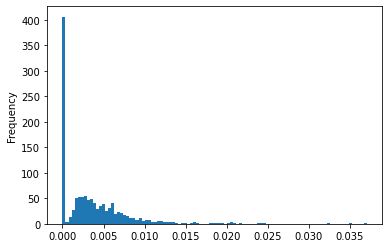

In [18]:
vote_file = df_2020_raw

vote_file = vote_file['פסולים'] / vote_file['מצביעים'] # divide number of invalid votes by number of votes per city

# vote_file.describe() - sanity check

print(vote_file.T['מאיר שפיה']) # sanity check

vote_file.plot.hist(bins = 100)  # plot histigram ratio invalid votes by number of votes per city

# vote_file.idxmax()  - check the arg of maximum value

print(vote_file.sort_values())  # find the three max cities by percentage of invalid number of votes



Q2 - apply a function that displays comparison of 2 cities by voting to the 8 biggest parties (thile the thresh is Electoral threshold)

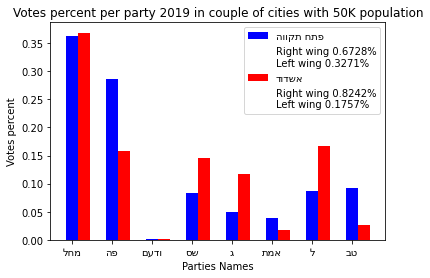

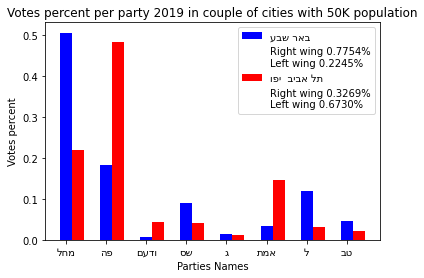

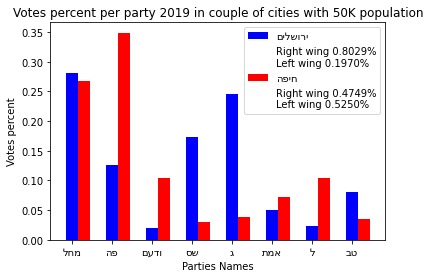

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa4625f9828>)

In [19]:
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Rectangle


# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2020, 0.001)  # total votes for each party
#total_votes.plot.bar()

# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city_1, city_2):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    number_of_parties = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes_1 = df.loc[city_1, names] / df.loc[city_1, names].sum()
    city_votes_2 = df.loc[city_2, names] / df.loc[city_2, names].sum()
    left_wing_c1=city_votes_1['ודעם']+city_votes_1['אמת']+city_votes_1['פה']
    right_wing_c1=1-left_wing_c1
    left_wing_c2=city_votes_2['ודעם']+city_votes_2['אמת']+city_votes_2['פה']
    right_wing_c2=1-left_wing_c2



    all_bar = ax.bar(np.arange(number_of_parties), list(city_votes_1), width, color='b')
    city_bar = ax.bar(np.arange(number_of_parties)+width, list(city_votes_2), width, color='r')


    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019 in couple of cities with 50K population')
    ax.set_xticks(np.arange(number_of_parties))
    ax.set_xticklabels(rev_names)

    dummy_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    dummy_2 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    ax.legend((all_bar[0], dummy_1,city_bar[0],dummy_2), (city_1[::-1], "Right wing "+str(right_wing_c1)[:6]+"%\n"+'Left wing '+str(left_wing_c1)[:6]+"%" ,city_2[::-1],"Right wing "+str(right_wing_c2)[:6]+"%\n"+'Left wing '+str(left_wing_c2)[:6]+"%" ))
    plt.show()

    return fig, ax

party_bar(df_2020, 0.0325, 'פתח תקווה', 'אשדוד')
party_bar(df_2020, 0.0325, 'באר שבע', 'תל אביב  יפו')
party_bar(df_2020, 0.0325, 'ירושלים', 'חיפה')



באר שבע תא :

1.באר שבע היא עיר פרברית יותר עם אוכלוסייה יותר ימנית שמרנית מסורתית ותל אביב היא עיר ליברלית משמעותית ולכן ההצבעה ההפוכה בין מחל לכחול לבן אינה מפתיעה שכן הבחירות במפלגות הגדולות נבעו בעיקר באי הסכמה על מי ישב כראש הממשלה

2.ההצבעה לרשימה המשותפת לתל אביב אינה מפתיע שכן חלק יש אוכלוסיה ערבית בתל אביב ובנוסף חלק ממצביעי הרשימה המשותפת מצביעים להם כי הרשימה מורכבת גם ממפלגות סוציאליסטיות וקומוניסטיות. גם אחוז המצביעים הערבים בבאר שבע לא מאוד מפתיע כי יש כמות מסויימת אומנם נמוכה של תושבים בדואים

3.בשני הערים אין כמות גדולה של חרדים מהזרם האשכנזי וזה מתבטא

4.ההצבעה לאמת היא הגיונית מפלגה שמורכבת ממרץ העבודה וגשר מפלגות סוציאליטיות ליבריליות שמתאימות לתל 
אביב, הכמות בבאר שבע לא מבוטלת ויכול להיות שזה בכלל מספר הסטודנטים הגבוה שגרים שם.

5.ישראל ביתנו מייצגת ימין חילוני ולא מפתיע שיש אחוז לא קטן של מצביעים אליו בבאר שבע

6.ימינה מייצג בעיקר דתיים לאומיים וחלק מהימין החילוני ונראה שזה אוכלוסיה שמבוטאת יותר בבאר שבע

חיפה ירושלים:
1.גם בחיפה וגם בירושלים יש אחוז גדול של ימנים מסורתיים\שמרנים וזה מתבטא באחוזי ההצבעה לליכוד
2.חיפה מוכרת כעיר ליברלית מאוד בשונה מירושלים וזה מסביר בצורה מסויימת את אחוזי ההצבעה לכחול לבן
3.בחיפה יש כמות גדולה של תושבים ערביים שהם ציבור הצבעה לרשימה המשותפת ונראה שהציבור הערבי בירושלים שיכול להצביע כנראה אינו גדול במיוחד ביחס לאוכלוסיית ירושלים
4.התמיכה ביהדות התורה בירושלים אינה מפתיעה

5.התמיכה בשס גם דומה שכן ירושלים ידועה כעיר דתית מאוד
6.התמיכה בעבודה גשר מרצ גבוהה בשניהם כי בשני הערים יש אחוז מסויים של שמאל ליברלי
7.נראה שליברמן מנצח בחיפה כי יש שם יותר ימין חילוני וזה הגיוני כי חוץ מימין מסורתי לא ראינו שם אחוז גבוהה של דתיים
8.ירושלים קרובה לשטחים ומושכת אליה דתיים לאומיים רבים וההצבעה לימינה אינה מפתיעה

אשדוד פתח תקווה
1.אחוז הערבים בפתח תקווה הינו זניח ולכן התמיכה במפלגה ודעם הינה  מיזערי
2.פתח תקווה עיר יותר חילונית ונוטה יותר למרכז 
3.יש אחוז כמעט זהה באוכלסייה שנוטה לכיוון מסורתי ימיני 
4.אחוז הדתיים גבוה יותר באשדוד מפתח תקווה עקב התמיכה השונה משמעותית למפלגה יהדות התורה
5.עקב כמות תמיכה כמעט כפול בישראל ביתנו באשדוד ניתן להסיק כי ישנו נתח גדול יותר של אוכלסייה המחזיק בראייה פוליטית ימינית קיצונית באשדוד לעומת פתח תקווה.
6.ננראה שיש יחס אוכלוסייה גדול יותר של דתיים לאומיים הגרים בפתח תקווה ביחס לאשדוד ולכן ההפרש בימינה בין הערים

In [21]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]



In [22]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax




Q3 : we find which city is most descriptive of the 2019 israeli elections results and the most undescriptive

קוממיות
מעטפות חיצוניות

שם ישוב
מעטפות חיצוניות     0.009138
חיפה                0.013144
ירכא                0.018226
רחובות              0.021555
פתח תקווה           0.023130
                      ...   
כאוכב אבו אלהיגא    0.924013
צנדלה               0.925683
אבו עבדון שבט       0.939121
יסודות              0.960040
קוממיות             1.000697
Length: 1214, dtype: float64


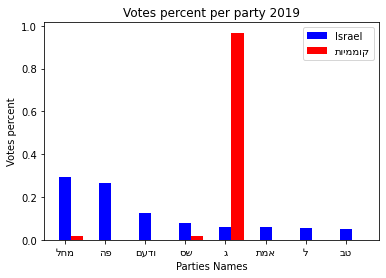

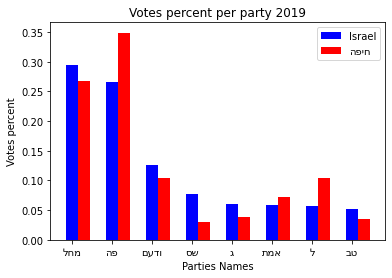

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa4622a2ba8>)

In [31]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
SUM_BY_COLUMNS=0
parties_vote=(df_2020.sum(axis=SUM_BY_COLUMNS)) 
total=parties_vote.sum() #Total amount of votes in Israel
israel_mean_vector=parties_vote/total # normalize the vector to get distribution 

#Using outer product to expand the array into a matrix with rows that include
#the total number of votes for the same city in the original
total_per_city=np.array(df_2020.sum(axis=1)).reshape(1,1214) 
midstep_vector=np.ones(30).reshape(30,1)
total_per_city_mat=((midstep_vector@total_per_city).T)

#Create a dist vector for each city by noramzliing by the total amount of votes.
per_city_vectors=(df_2020/total_per_city_mat)

#Calcaulte distance measure
distance_l1=(per_city_vectors-israel_mean_vector) #p-q
distance_l2=distance_l1*distance_l1 #(p-q)^2
final_distances=(distance_l2.sum(axis=1)) # sigma ((pi-qi)^2)

#most likely and most unlikely
print(final_distances.idxmax())
print(final_distances.idxmin()+"\n")


print(final_distances.sort_values())

df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns

party_bar(df_2020,0.0325,'קוממיות') # most unrepresetive city
party_bar(df_2020,0.0325,'חיפה') # most representatvive city



הסיבה לכך שההתפלגות של חיפה היא בעלת המרחק הנמוך ביותר מהוקטור ההתפלגויות של ישראל היא כי חיפה היא עיר מאוד מגוונת עם אוכלוסיה הטרוגנית אשר משקפת נאמנה יחסית את פיזור האוכלוסייה בארץ חילונים דתיים יהודים ערבים

בעיקרון מעטפות חיצוניות ייצגו יותר נאמנה את הבחירות
אבל הם אינן עיר ולא ניתן לייחס אותם למגוון אוכלוסייה מסויים מידיי כי הם מורכבים ממוקומות שונים.

קוממיות היא היישוב הכי פחות מייצג זה לא מפתיע כי הרוב המוחלט של האוכלוסייה הם חרדים שנוטים להצביע בצורה הומוגנית